In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [27]:
class GridWorld():
  def __init__(self):
    self.x=3
    self.y=0

  def step(self, a):
    if a==0:
      self.move_right()
    elif a==1:
      self.move_left()
    elif a==2:
      self.move_up()
    elif a==3:
      self.move_down()

    reward = -1
    #빠졌으면 리워드를 매우 감소
    if self.x == 3 and (self.y >= 1 and self.y <= 10):
      reward = -999


    done = self.is_done()
    return (self.x, self.y), reward, done


  #grid를 4x12
  def move_right(self):
    self.y += 1
    if self.y > 11:
      self.y = 11

  def move_left(self):
    self.y -= 1
    if self.y < 0:
      self.y = 0

  def move_up(self):
    self.x -= 1
    if self.x < 0:
      self.x = 0

  def move_down(self):
    self.x += 1
    if self.x >3:
      self.x = 3

  #골에 도달하거나 cliff를 밟으면 에피소드를 종료
  def is_done(self):
    #if (self.x == 3 and ( self.y >= 1 and self.y <= 11)):
    if (self.x == 3 and self.y==11):
      return True
    else:
      return False

  def get_state(self):
    return (self.x, self.y)

  def reset(self):
    self.x = 3
    self.y = 0
    return (self.x, self.y)



In [28]:
class AgentSARSA():
  def __init__(self):
    self.q_table = np.zeros((4,12,4)) # x size, y size, number of action
    self.eps = 0.9
    self.alpha = 0.1 # step size
    self.gamma = 1 # discount factor

  def select_action(self, s):
    x, y = s
    prob =  random.random()

    if prob < self.eps: # exploration
      action = random.randint(0,3)
    else: # exploitation
      action_val = self.q_table[x,y,:]
      action = np.argmax(action_val)
    return action

  ## fill your code
  def update_table(self, transition):
    s,a,r,s_next = transition
    x,y = s
    x_next, y_next = s_next
    a_next = self.select_action(s_next)
    # SARSA
    self.q_table[x,y,a] = self.q_table[x,y,a]+ self.alpha*(r + self.gamma*self.q_table[x_next,y_next,a_next]-self.q_table[x,y,a])
  ##

  def anneal_eps(self):
    self.eps -= 0.001
    self.eps = max(self.eps, 0.01)

  def show_table(self):
    q_list = self.q_table.tolist()
    best_qvalue = np.zeros((4,12))
    best_action = np.zeros((4,12))
    for row_idx in range(len(q_list)):
      row = q_list[row_idx]
      for col_idx in range(len(row)):
        col = row[col_idx]
        qvalue = np.max(col)
        action = np.argmax(col)
        best_qvalue[row_idx, col_idx] = qvalue
        best_action[row_idx, col_idx] = action
    return best_qvalue, best_action

In [ ]:
def main():
  env = GridWorld()
  agent = AgentSARSA()

  for n_epi in range(20000):
    done = False

    s = env.reset()
    while not done:
      a = agent.select_action(s)
      s_next, r, done = env.step(a)
      agent.update_table((s,a,r,s_next))
      s = s_next
    # agent.update_table(history, n_epi) # table update
    agent.anneal_eps()

  # result
  opt_q, opt_policy = agent.show_table()

  fig, ax = plt.subplots(figsize=(12, 8))
  plt.imshow(opt_policy, cmap='cool', interpolation='nearest')
  for i in range(4):
    for j in range(12):
        tempstr = "{:.2f}".format(opt_q[i][j])
        text = ax.text(j, i, tempstr, ha="center", va="center", color="k")
  plt.show()

  fig, ax = plt.subplots( )
  plt.imshow(opt_policy, cmap='cool', interpolation='nearest')
  for i in range(4):
    for j in range(12):
        if opt_policy[i][j] == 0:
            tempstr = "→"
        elif opt_policy[i][j] == 1:
            tempstr = "←"
        elif opt_policy[i][j] == 2:
            tempstr = "↑"
        else:
            tempstr = "↓"
        text = ax.text(j, i, tempstr, ha="center", va="center", color="k")
  plt.show()


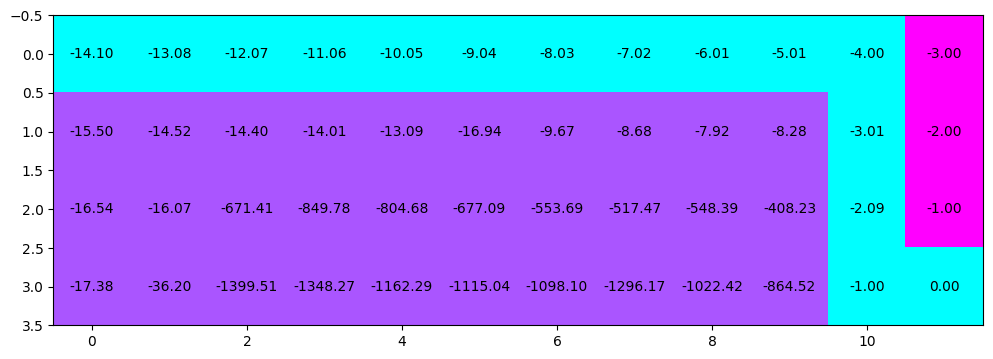

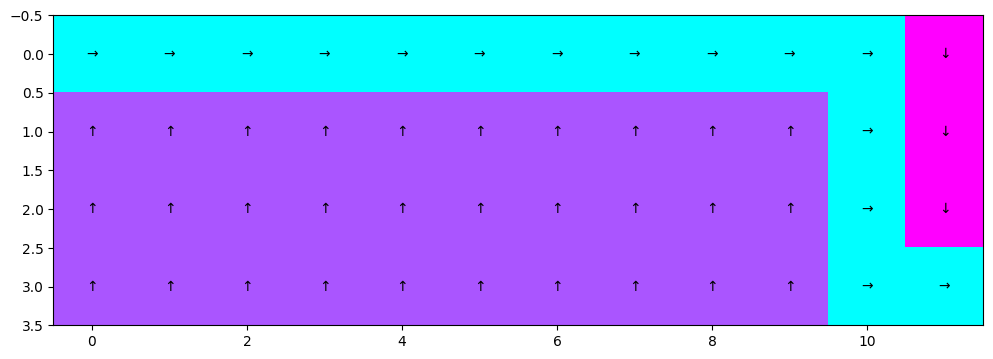

In [30]:
main()